# Evaluating classification models on Yale B

## Prepare data

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:

path = '/content/drive/My Drive/'

In [41]:
# obtain the data

from numpy import load
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


y = load(path +'yaleExtB_target.npy')
X = load(path +'yaleExtB_data.npy')



In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

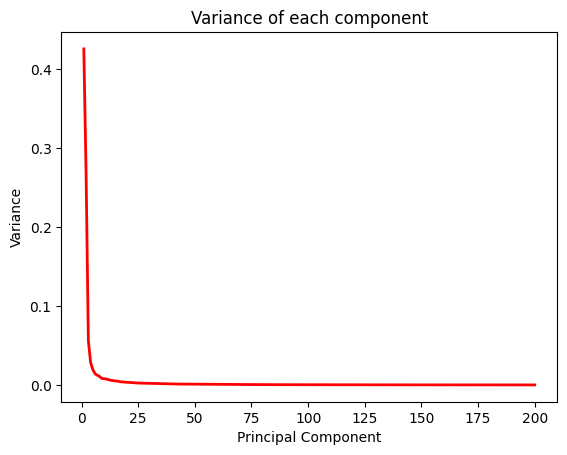

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

variance = pca.explained_variance_ratio_

# plot the variance for each component
plt.plot(range(1, len(variance)+1), variance, 'r-', linewidth=2)
plt.title('Variance of each component')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# define the MLP classifier
mlp = MLPClassifier(max_iter=300)

# define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.1),
    'learning_rate_init': uniform(0.0001, 0.1),
    'max_iter': randint(200, 1000)
}



In [ ]:
# define the RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10)

# fit the RandomizedSearchCV object to the data
random_search.fit(X_train_pca, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (425) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (425) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (425) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (425) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

RandomizedSearchCV(estimator=MLPClassifier(max_iter=300),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb761235100>,
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 100)],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb7597171c0>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb7597159d0>,
                                        'solver': ['adam', 'sgd']})

In [ ]:
#classification report of random search with MLP
from sklearn.metrics import classification_report

y_true,y_pred = y_test , random_search.predict(X_test_pca)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        12
         4.0       1.00      0.95      0.97        19
         5.0       1.00      0.78      0.88        23
         6.0       0.95      1.00      0.97        18
         7.0       1.00      1.00      1.00        17
         8.0       1.00      1.00      1.00        14
         9.0       1.00      1.00      1.00        11
        11.0       1.00      1.00      1.00        15
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        13
        15.0       1.00      0.94      0.97        16
        16.0       0.93      1.00      0.97        14
        17.0       0.94      0.94      0.94        17
        18.0       1.00      1.00      1.00        13
        20.0       0.93      1.00      0.96        13
        22.0       1.00      1.00      1.00        23
        23.0       1.00      1.00      1.00        15
  

In [ ]:
# identify perfect/best hyperparameters
print('Best parameters found:\n', random_search.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.02588906274109698, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.013507985880041373, 'max_iter': 288, 'solver': 'adam'}


In [ ]:
#Grid search with MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=300)

#Define parameter space
parameter_space = {
    'hidden_layer_sizes': [(100,),(200,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.1, 0.5, 0.7],
    'learning_rate': ['constant','adaptive','invscaling'],
}



clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_pca, y_train) 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.1, 0.5, 0.7],
                         'hidden_layer_sizes': [(100,), (200,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [ ]:

# identify perfect/best hyperparameters
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.7, 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [ ]:
# prediction
y_true, y_pred = y_test , clf.predict(X_test_pca)

from sklearn.metrics import classification_report

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        12
         4.0       1.00      0.95      0.97        19
         5.0       1.00      0.87      0.93        23
         6.0       0.95      1.00      0.97        18
         7.0       0.94      1.00      0.97        17
         8.0       0.93      1.00      0.97        14
         9.0       1.00      1.00      1.00        11
        11.0       1.00      1.00      1.00        15
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        13
        15.0       1.00      0.94      0.97        16
        16.0       0.93      1.00      0.97        14
        17.0       1.00      0.88      0.94        17
        18.0       1.00      1.00      1.00        13
        20.0       0.87      1.00      0.93        13
        22.0       1.00      0.96      0.98        23
        23.0       1.00      1.00      1.00        15
  

In [42]:
#Adaptive boosting Decision tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.33, random_state=42)


# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train_svc) 
X_test_pca = pca.transform(X_test_svc)



In [50]:
#creating decision tree
dt_clf = DecisionTreeClassifier(max_depth=5,criterion='entropy')
# Create AdaBoost classifier with Decision tree as estimator
ada_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=250, learning_rate=0.2, algorithm = "SAMME.R")

In [51]:
# Train AdaBoost classifier on training set
ada_clf.fit(X_train_pca, y_train_svc)


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5),
                   learning_rate=0.2, n_estimators=250)

In [52]:
# Test AdaBoost classifier on testing set and print classification report
y_pred_svc = ada_clf.predict(X_test_pca)
print(classification_report(y_test_svc, y_pred_svc))

              precision    recall  f1-score   support

         3.0       1.00      0.95      0.97        19
         4.0       1.00      0.58      0.73        26
         5.0       0.60      0.90      0.72        10
         6.0       0.95      0.95      0.95        19
         7.0       0.88      0.82      0.85        17
         8.0       0.93      0.93      0.93        14
         9.0       0.93      0.93      0.93        15
        11.0       0.73      0.92      0.81        12
        12.0       1.00      0.89      0.94        18
        13.0       0.77      1.00      0.87        20
        15.0       0.79      1.00      0.88        11
        16.0       0.81      0.81      0.81        16
        17.0       0.83      0.94      0.88        16
        18.0       1.00      0.85      0.92        13
        20.0       0.94      1.00      0.97        16
        22.0       1.00      0.60      0.75        20
        23.0       1.00      0.81      0.89        21
        24.0       0.95    